## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# # Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
MOMENTUM = 0.95
BATCH_SIZE = [256, 128, 32, 16, 2]

In [7]:
results = {}
for size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
#     model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=size, 
              verbose=2,
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    results[size] = [model.history.history["loss"],
                    model.history.history["val_loss"],
                    model.history.history["acc"],
                    model.history.history["val_acc"]]







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





 - 6s - loss: 1.8480 - acc: 0.3609 - val_loss: 1.9611 - val_acc: 0.3382
Epoch 2/50
 - 4s - loss: 1.5461 - acc: 0.4553 - val_loss: 1.6367 - val_acc: 0.4294
Epoch 3/50
 - 4s - loss: 1.4461 - acc: 0.4929 - val_loss: 1.5497 - val_acc: 0.4581
Epoch 4/50
 - 4s - loss: 1.3701 - acc: 0.5197 - val_loss: 1.5427 - val_acc: 0.4626
Epoch 5/50
 - 4s - loss: 1.3107 - acc: 0.5422 - val_loss: 1.4978 - val_acc: 0.4779
Epoch 6/50
 - 4s - loss: 1.2592 - acc: 0.5603 - val_loss: 1.5399 - val_acc: 0.4637
Epoch 7/50
 - 4s - loss: 1.2159 - acc: 0.5767 - val_loss: 1.5123 - val_acc: 0.4731
Epoch 8/50
 - 4s - loss: 1.1713 - acc: 0.5932 - val_loss: 1.4577 - val_acc: 0.4909
Epoch 9/50
 - 4s - loss: 1.1278 - acc: 0.6083 - val_loss: 1.4876 - val_acc: 0.4828
Epoch 10/50
 - 4s - loss: 1.0889 - acc: 0.6216 - val_loss: 1.5175 - val_acc: 0.4757
Epoch 11/50

Epoch 12/50
 - 5s - loss: 0.9751 - acc: 0.6571 - val_loss: 1.5692 - val_acc: 0.4739
Epoch 13/50
 - 6s - loss: 0.9414 - acc: 0.6695 - val_loss: 1.5852 - val_acc: 0.4649
Epoch 14/50
 - 6s - loss: 0.9065 - acc: 0.6815 - val_loss: 1.6518 - val_acc: 0.4644
Epoch 15/50
 - 5s - loss: 0.8743 - acc: 0.6947 - val_loss: 1.6108 - val_acc: 0.4649
Epoch 16/50
 - 6s - loss: 0.8486 - acc: 0.7042 - val_loss: 1.6192 - val_acc: 0.4674
Epoch 17/50
 - 6s - loss: 0.8199 - acc: 0.7125 - val_loss: 1.6938 - val_acc: 0.4543
Epoch 18/50
 - 6s - loss: 0.7919 - acc: 0.7230 - val_loss: 1.7852 - val_acc: 0.4570
Epoch 19/50
 - 6s - loss: 0.7749 - acc: 0.7283 - val_loss: 1.6640 - val_acc: 0.4785
Epoch 20/50
 - 5s - loss: 0.7499 - acc: 0.7380 - val_loss: 1.7345 - val_acc: 0.4642
Epoch 21/50
 - 6s - loss: 0.7287 - acc: 0.7464 - val_loss: 1.7156 - val_acc: 0.4703
Epoch 22/50
 - 5s - loss: 0.6993 - acc: 0.7555 - val_loss: 1.8896 - val_acc: 0.4530
Epoch 23/50
 - 6s - loss: 0.6762 - acc: 0.7642 - val_loss: 1.9361 - val_acc:

Epoch 8/50
 - 28s - loss: 1.4334 - acc: 0.4908 - val_loss: 1.4643 - val_acc: 0.4743
Epoch 9/50
 - 28s - loss: 1.4154 - acc: 0.4964 - val_loss: 1.5584 - val_acc: 0.4563
Epoch 10/50
 - 28s - loss: 1.3916 - acc: 0.5064 - val_loss: 1.4513 - val_acc: 0.4870
Epoch 11/50
 - 29s - loss: 1.3780 - acc: 0.5082 - val_loss: 1.6413 - val_acc: 0.4241
Epoch 12/50
 - 28s - loss: 1.3758 - acc: 0.5108 - val_loss: 1.3821 - val_acc: 0.5023
Epoch 13/50
 - 28s - loss: 1.3435 - acc: 0.5234 - val_loss: 1.4265 - val_acc: 0.4958
Epoch 14/50
 - 28s - loss: 1.3344 - acc: 0.5275 - val_loss: 1.5269 - val_acc: 0.4648
Epoch 15/50
 - 28s - loss: 1.3303 - acc: 0.5263 - val_loss: 1.3823 - val_acc: 0.5098
Epoch 16/50
 - 29s - loss: 1.3180 - acc: 0.5320 - val_loss: 1.3745 - val_acc: 0.5163
Epoch 17/50
 - 28s - loss: 1.2978 - acc: 0.5402 - val_loss: 1.3380 - val_acc: 0.5255
Epoch 18/50
 - 29s - loss: 1.2856 - acc: 0.5433 - val_loss: 1.3846 - val_acc: 0.5029
Epoch 19/50
 - 28s - loss: 1.2743 - acc: 0.5469 - val_loss: 1.4000 

In [22]:
axs[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E6D005668>,
      dtype=object)

C:\Miniconda3\envs\t1\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Miniconda3\envs\t1\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Miniconda3\envs\t1\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes c

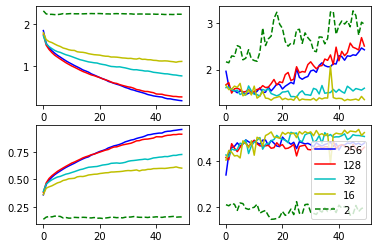

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color = ['b', 'r', 'c', 'y', 'g--']
for i, (size, history) in enumerate(results.items()):
    plt.subplot(221)
    plt.plot(range(len(history[0])), history[0], color[i], label=size)
    plt.subplot(222)
    plt.plot(range(len(history[1])), history[1], color[i], label=size)
    plt.subplot(223)
    plt.plot(range(len(history[2])), history[2], color[i], label=size)
    plt.subplot(224)
    plt.plot(range(len(history[3])), history[3], color[i], label=size)


plt.legend()
plt.show()